In [1]:
from facet_ml.classification import cnn
from torchvision.models import resnet152
import torch
from facet_ml.segmentation.segmenter import ImageSegmenter

device ="cuda"

In [2]:
## Load model
model  = cnn.load_model("resnet152_trained_Best.pth",resnet152)

## Load an ImageSegmenter
img_path = r"C:\Users\Jacob\Desktop\Academics\Mirkin\colloidal_crystal_ML\Images\Training\4 nM 5.bmp"
img_path = r"C:\Users\Jacob\Desktop\Academics\Mirkin\colloidal_crystal_ML\Images\Training\39.5 hold 1.bmp"
IS = ImageSegmenter(img_path,segmenter="segment_anything")


In [3]:
# ## Using the model, get the predicted label for each image segmenter
# for _,row in IS.df.iterrows():
#     region = row.Region
#     img = IS._grab_region(IS.image_cropped,region,0,5)
#     img_tensor = cnn.get_transform(train=False,)().forward(img)
#     img_tensor = img_tensor.reshape()
#     model(img_tensor)

C:\Users\Jacob\Desktop\Academics\Mirkin\colloidal_crystal_ML\facet_ml\segmentation\segmenter.py:672: RuntimeWarning: divide by zero encountered in divide
  clusters["major_axis_length"] / clusters["minor_axis_length"]
C:\Users\Jacob\Desktop\Academics\Mirkin\colloidal_crystal_ML\facet_ml\segmentation\segmenter.py:672: RuntimeWarning: invalid value encountered in divide
  clusters["major_axis_length"] / clusters["minor_axis_length"]
C:\Users\Jacob\Desktop\Academics\Mirkin\colloidal_crystal_ML\facet_ml\segmentation\segmenter.py:675: RuntimeWarning: invalid value encountered in divide
  clusters["perimeter"] / clusters["major_axis_length"]
C:\Users\Jacob\Desktop\Academics\Mirkin\colloidal_crystal_ML\facet_ml\segmentation\segmenter.py:678: RuntimeWarning: invalid value encountered in divide
  clusters["perimeter"] / clusters["minor_axis_length"]
C:\Users\Jacob\Desktop\Academics\Mirkin\colloidal_crystal_ML\facet_ml\segmentation\features.py:478: RankWarning: Polyfit may be poorly conditioned


TypeError: reshape() missing 1 required positional arguments: "shape"

In [4]:
dataset = cnn.ColloidalDataset.from_image_segmenter(IS)
dataset.transforms = cnn.get_transform(train=False)()

In [5]:
dataloader = torch.utils.data.DataLoader(dataset,
                                         batch_size=16,
                                         num_workers = 4)
all_predictions = []
for inputs, labels in dataloader:
    inputs.to(device)
    labels.to(device)
    with torch.set_grad_enabled(False):
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        all_predictions.extend(preds.cpu().numpy())

In [6]:
IS.df.Labels = [cnn.INT_TO_LABEL[L] for L in all_predictions]

In [9]:
all_predictions
IS.df.Labels

0      I
102    C
101    B
100    C
99     B
      ..
47     C
48     B
49     B
43     I
139    B
Name: Labels, Length: 140, dtype: object

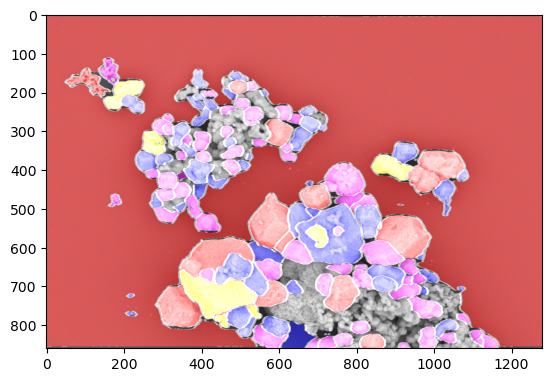

In [10]:
## Import colorization
from facet_ml.classification.model_using import visualize_labels
import numpy as np
color_dict: dict = { 
    "C": np.array([0, 0, 255]),
    "MC": np.array([255, 255, 0]),
    "I": np.array([255, 0, 0]),
    "PS": np.array([0, 255, 0]) 
    }
color_img = visualize_labels(IS, df=IS.df,color_dict=color_dict)

import matplotlib.pyplot as plt

plt.imshow(color_img)